# Lección 4: Asunciones

### Ejercicios de pair programming 19 de enero.


En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.


El objetivo de este pair programming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. 

    Recordamos que estas asunciones son:

    - Normalidad (ya la deberíais haber evaluado)
    - Homogeneidad de varianzas
    - Independencia de las variables

        Cada asuncion la debereis testar de forma visual y analitica.
        

In [42]:
# importamos las librerias que nos hacen falta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import researchpy as rp
from scipy.stats import levene

import warnings
warnings.filterwarnings('ignore')

In [43]:
#abrimos nuestro DataFrame
df = pd.read_csv("archive/df_unido.csv", index_col = 0)
df.head(2)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


# Analizamos la normalidad:

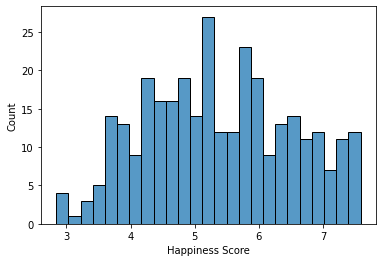

In [44]:
# primero lo hacemos visualmente

sns.histplot(df["Happiness Score"],  bins=25);  #lo tenemos que calcular con la variable respuesta

Vemos que no sigue una distribucion normal, pero aun asi lo analizamos tambien analiticamente:

In [45]:
stats.shapiro(df["Happiness Score"])

ShapiroResult(statistic=0.979936957359314, pvalue=0.00021602705237455666)

El test de Shapiro nos da un p_valor de 0.0002 (mas bajo que 0.05) por lo tanto podemos rechazar la H0(los datos son normales) y afirmamos que nuestros datos no son normales

# Independencia de las variables:

In [46]:
#Vamos a analizar Happiness Rank con un par de variables para conocer su independencia (empezamos con Family)
crosstab, test_results, expected = rp.crosstab(df["Happiness Rank"], df["Family"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

In [47]:
crosstab.head()

Family                                                        \
Family            0.0 0.10419 0.11037 0.13995 0.147 0.14866 0.18519 0.19249   
Happiness Rank                                                                
1                 0.0     0.0     0.0     0.0   0.0     0.0     0.0     0.0   
2                 0.0     0.0     0.0     0.0   0.0     0.0     0.0     0.0   
3                 0.0     0.0     0.0     0.0   0.0     0.0     0.0     0.0   
4                 0.0     0.0     0.0     0.0   0.0     0.0     0.0     0.0   
5                 0.0     0.0     0.0     0.0   0.0     0.0     0.0     0.0   

                                ...                                          \
Family         0.23442 0.24749  ... 1.31826 1.31967 1.32261 1.33095 1.34043   
Happiness Rank                  ...                                           
1                  0.0     0.0  ...     0.0     0.0    0.00    0.00     0.0   
2                  0.0     0.0  ...     0.0     0.0    0.00    0.00     0.0   
3                  0.0     0.0  ...     0.0     0.0    0.00    0.00     0.0   
4                  0.0     0.0  ...     0.0     0.0    0.00    0.32     0.0   
5                  0.0     0.0  ...     0.0     0.0    0.32    0.00     0.0   

                                                      
Family         1.34951 1.36058 1.36948 1.40223   All  
Happiness Rank                                        
1                 0.32    0.00     0.0    0.00  0.63  
2                 0.00    0.00     0.0    0.32  0.63  
3                 0.00    0.32     0.0    0.00  0.63  
4                 0.00    0.00     0.0    0.00  0.63  
5                 0.00    0.00     0.0    0.00  0.63  

[5 rows x 315 columns]

In [48]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 49141.0) =,49297.5000
1,p-value =,0.3083
2,Cramer's V =,0.9984


En nuestro caso Happines Rank y family son variables independientes, y el v-Cramer nos dice que tienen una independencia alta

Vamos a calcularlo ahora con otras dos variables

In [49]:
crosstab2, test_results2, expected2 = rp.crosstab(df["Economy (GDP per Capita)"], df["Freedom"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

In [50]:
crosstab2.head()

Freedom                                         \
Freedom                      0.0 0.00589 0.0432 0.05822 0.06912 0.07699   
Economy (GDP per Capita)                                                  
0.0                          0.0     0.0   0.00     0.0     0.0     0.0   
0.0153                       0.0     0.0   0.00     0.0     0.0     0.0   
0.01604                      0.0     0.0   0.00     0.0     0.0     0.0   
0.05661                      0.0     0.0   0.00     0.0     0.0     0.0   
0.06831                      0.0     0.0   0.32     0.0     0.0     0.0   

                                                          ...                  \
Freedom                  0.09245 0.09511 0.10081 0.10384  ... 0.64157 0.64169   
Economy (GDP per Capita)                                  ...                   
0.0                          0.0     0.0     0.0     0.0  ...     0.0     0.0   
0.0153                       0.0     0.0     0.0     0.0  ...     0.0     0.0   
0.01604                      0.0     0.0     0.0     0.0  ...     0.0     0.0   
0.05661                      0.0     0.0     0.0     0.0  ...     0.0     0.0   
0.06831                      0.0     0.0     0.0     0.0  ...     0.0     0.0   

                                                                         \
Freedom                  0.64938 0.65124 0.65821 0.6598 0.66246 0.66557   
Economy (GDP per Capita)                                                  
0.0                          0.0     0.0     0.0    0.0     0.0     0.0   
0.0153                       0.0     0.0     0.0    0.0     0.0     0.0   
0.01604                      0.0     0.0     0.0    0.0     0.0     0.0   
0.05661                      0.0     0.0     0.0    0.0     0.0     0.0   
0.06831                      0.0     0.0     0.0    0.0     0.0     0.0   

                                        
Freedom                  0.66973   All  
Economy (GDP per Capita)                
0.0                          0.0  0.63  
0.0153                       0.0  0.32  
0.01604                      0.0  0.32  
0.05661                      0.0  0.32  
0.06831                      0.0  0.32  

[5 rows x 309 columns]

In [51]:
test_results2

,Chi-square test,results
0,Pearson Chi-square ( 95784.0) =,96075.0000
1,p-value =,0.2528
2,Cramer's V =,0.9967


Tambien vemos que las variables "Freedom" y "Economy" no son nada dependientes, y ademas tienen una independencia muy alta

# Homogeneidad de varianzas:

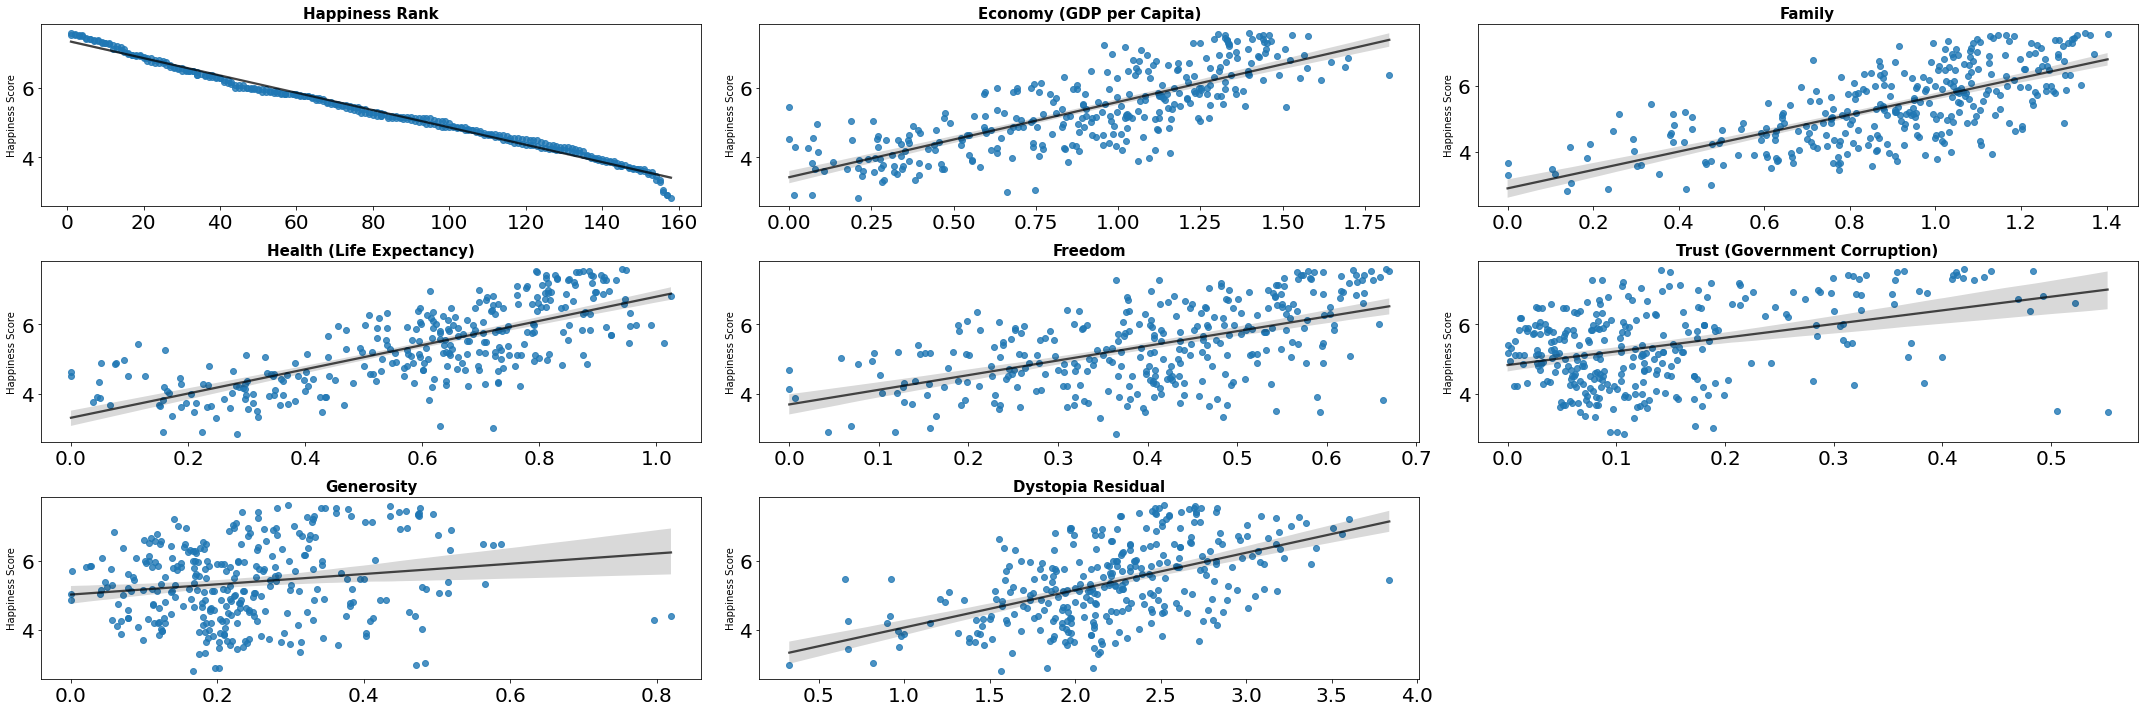

In [52]:
#Haremos la evaluacion sobre las variables predictoras

# GRAFICAMENTE (REGPLOT):


# iniciamos los subplots
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (30, 10))

# definimos una lista de colores. Cada color corresponderá a una gráfica
lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

# hemos creado una gráfica con varios subplots. Si queremos automatizar el proceso de relleno de cada uno de los plots
## podemos usar el método .flat. Lo que hace es aplanar los ejes para que queden en una única dimensión
## y luego los vamos rellenando. 
axes = axes.flat

# seleccionamos las columnas que queremos graficar
columnas_numeric = df.select_dtypes(include = np.number).drop('Happiness Score', axis=1)
columnas_numeric = columnas_numeric.columns

# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = df,
        x = colum,
        y = 'Happiness Score',
        #color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
fig.tight_layout()
fig.delaxes(axes[-1]);



In [57]:
# creamos un diccionario para almacenar los resultados de los test
resultados = {}

# seleccionamos solo las columnas numéricas y eliminamos la columna de precio
numericas_col = df.select_dtypes(include = np.number).drop("Happiness Score", axis = 1).columns

#iteremos por la lista de las columnas numéricas
for col in numericas_col:
    # calculamos el p-valor de test
    statistic, p_val = levene(df[col], df["Happiness Score"], center='median')
    # lo almacenamos en el diccionario
    resultados[col] = p_val

In [58]:
resultados

{'Happiness Rank': 5.2709665114419684e-123,
 'Economy (GDP per Capita)': 2.0094036404908995e-49,
 'Family': 7.457499749586487e-68,
 'Health (Life Expectancy)': 7.947745603819054e-74,
 'Freedom': 1.4636390857898317e-86,
 'Trust (Government Corruption)': 1.30803306848509e-92,
 'Generosity': 3.059750011700018e-90,
 'Dystopia Residual': 8.847628566888192e-34}

Todos los valores son menor que 0.05 por lo tanto, los datos no tienen varianzas constantes y no cumplen esta asunción. 